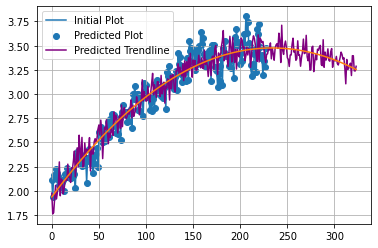

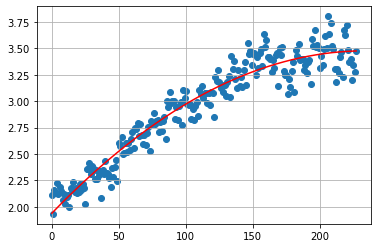

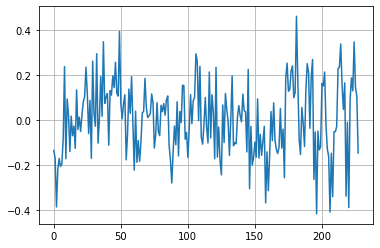

In [5]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
#import pygal
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
#import mypy
import math
import pandas as pd
# from IPython import qt
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get

os.system("cls")
plt.close()

#%%
# Imports dataset
dataset = pd.read_csv('cadairydata.csv')

# Count rows & columns
row_data, col_data = dataset.shape

#%%
# Intialize matrix

# Matrix Size: Degree of Polynomial
poly_deg = 2
mat_size = poly_deg + 1

# Create dummy matrix
a = np.ones((mat_size,mat_size))
b = np.ones((mat_size,1))

#%%
# Create Input & Output arrays

# Create output values
y = []
for i in range(0,row_data):
    y.append(dataset.iloc[i,7])

# Create input values
len_Jan = len(y)
x = list(range(0,len_Jan))
actual_x = x

# Normalize input array
# Mean
meanX = np.mean(x, axis=0)
# meanY = np.mean(y_Jan, axis=0)
# Standard Deviation
stdX = np.std(x, axis = 0)
x = (x- meanX) / stdX
# Variance
varX = np.var(y)
meanY = np.mean(y)
stdY = np.std(y)

#%%
# Create design matrix
for i in range(0,mat_size):
    for j in range(0,mat_size):
        a[i][j] = sum(np.power(x,(i+j)))

# Create matrix
amat = np.mat(a)

# Create design output
for k in range(0, mat_size):
    b[k] = sum(np.power(x,k) * y)

#%%
# Calculate coefficients
# Inverse input matrix
amat_inv = np.linalg.pinv(amat)
z = amat_inv * b
# Transpose coefficient vector
zz = z.T
# Reverse index list
z3 = zz[::-1]

#%%
# Predict values
# Create list
x_list = list(range(0,228))
x = x_list
# Normalization
x = (x - meanX) / stdX

# Create dummy array
J = np.ones((len(x), 1))
cost = np.ones((len(x),1))
vec_out = np.ones((mat_size, 1))
# Solve for predicted values
for q in (range(len(x))):
    for p in range(0, mat_size):
        vec_out[p] = x[q] ** p
    # Algebraic vector
    vec_out = np.matrix(vec_out)
    # Matrix multiplication
    l = np.matmul(z3,vec_out)
    J[q] = l
    # Cost Function
    cost[q] = (1/(2 * len(x))) * np.sum(np.square(J[q] - vec_out))


#%%
# Create vector of input terms
x_list = list(range(0,324))
x = x_list
# Normalization
x = (x - meanX) / stdX

# Create dummy array
J_tot = np.ones((len(x), 1))
cost = np.ones((len(x),1))
vec_out = np.ones((mat_size, 1))
# Solve for predicted values
for q in (range(len(x))):
    for p in range(0, mat_size):
        vec_out[p] = x[q] ** p
    # Algebraic terms
    vec_out = np.matrix(vec_out)
    # Matrix multiplication
    o = np.matmul(z3,vec_out)
    # print(o)
    # Alternative method
    # J_tot[q] = np.random.normal(o,varX ** 2,1)
    # J_tot[q] = np.random.randn(1) * (varX ** 2) + o
    J_tot[q] = np.sum(np.random.randn(mat_size)) * (varX ** 2) + o
    # J_tot[q] = np.sum(np.random.randn(mat_size)) * (varX**2) + meanY
    # Cost function
    cost[q] = (1/(2 * len(x))) * np.sum(np.square(J_tot[q] - vec_out))


# Convert from array to list
J_tot_list = J_tot.tolist()

# Create dummy array
J_tot_smooth = np.ones((len(x), 1))
cost_smooth = np.ones((len(x),1))
vec_out = np.ones((mat_size, 1))
# Solve for predicted values
for q in (range(len(x))):
    for p in range(0, mat_size):
        vec_out[p] = x[q] ** p
    # Alebraic terms
    vec_out = np.matrix(vec_out)
    # Matrix multiplication
    l = np.matmul(z3,vec_out)
    # Solve to create smoothen curve
    J_tot_smooth[q] = l
    # Cost function
    cost_smooth[q] = (1/(2 * len(x))) * np.sum(np.square(J_tot_smooth[q] - vec_out))

#%%
# Errors
# Initialize error array
error = []
for i in range(0,len(y)):
    pred_error = J_tot_list[i]
    actual_error = y[i]
    err = pred_error - actual_error
    error.append(err)

#%%
# Plots
# Actual & Predicted values
plot1 = plt.figure(1)
plt.plot(actual_x, y)
plt.scatter(actual_x, y)
plt.plot(x_list, J_tot, color='purple')
plt.plot(x_list, J_tot_smooth)
plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()

# Scatter plot
plot2 = plt.figure(2)
plt.scatter(actual_x, y)
plt.plot(actual_x, J_tot_smooth[0:228], color="Red")
plt.grid()

# Error plot
plot3 = plt.figure(3)
plt.plot(error)
plt.grid()

# Show Plot
plt.show()